## Credit Card Customer Segmentation
- This case requires developing a customer segmentation to define marketing strategy
- Unsupervised Learning - There is no target variable

#### Tasks
- Prepare intelligent KPI's
- Provide detailed insights based on the analysis
- Cluster Analysis
- Provide strategic insights

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Load Dataset

In [2]:
creditcarddata = pd.read_csv("Data/CC GENERAL.csv")

In [3]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#use seaborn graph styple

plt.style.use("seaborn")

## Exploratory Data Analysis

In [5]:
### data dimensions

creditcarddata.shape

(8950, 18)

In [6]:
## Data Types
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
### Checking for Missing Values

creditcarddata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

In [8]:
##Checking the missing value count for CREDIT LIMIT

creditcarddata['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [9]:
##Checking missing value count for MINIMUM PAYMENTS

creditcarddata['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

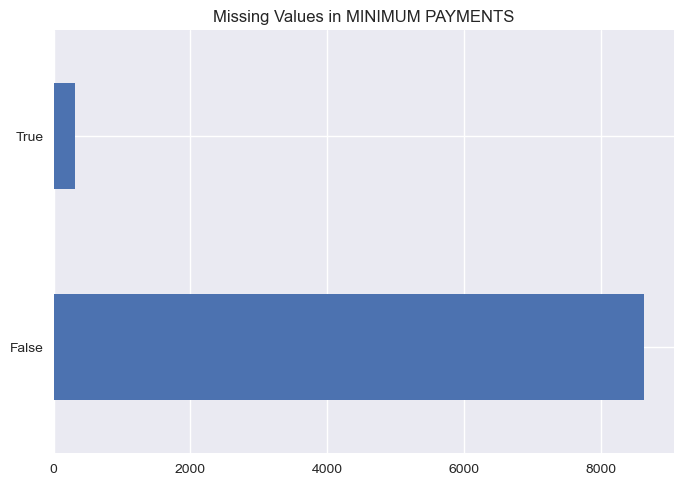

In [10]:
creditcarddata['MINIMUM_PAYMENTS'].isnull().value_counts().plot.barh()

plt.title("Missing Values in MINIMUM PAYMENTS")
plt.show()

- Descriptive Analysis of data

In [11]:
print(creditcarddata["MINIMUM_PAYMENTS"].describe())

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [12]:
## Intital descriptive analysis of the data

creditcarddata.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,4338.563657,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,2542.624000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,1600.099000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,1140.070000,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,3065.534560,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,0.750000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,0.416667,1.50000


### Missing Value Treatment

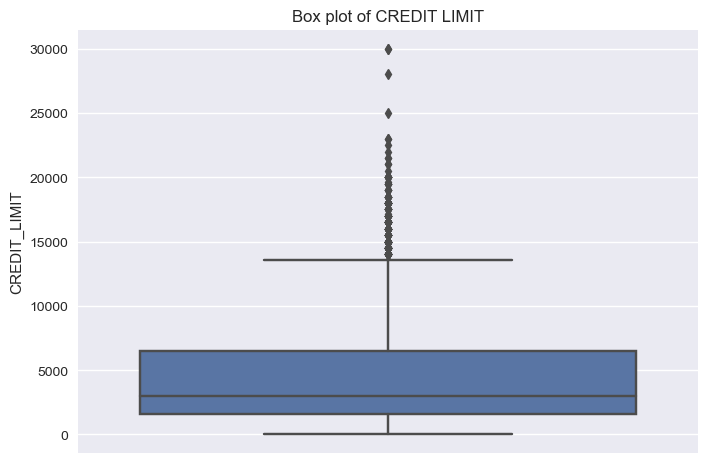

In [13]:
##Checking the distribution of 'CREDIT LIMIT'

sns.boxplot(y = "CREDIT_LIMIT", data=creditcarddata)
plt.title("Box plot of CREDIT LIMIT")

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [14]:
#Impute with median

creditcarddata['CREDIT_LIMIT'].fillna(creditcarddata['CREDIT_LIMIT'].median(),inplace = True)

In [15]:
#Rechecking whether imputing sucessfull or not
creditcarddata['CREDIT_LIMIT'].isnull().sum()

0

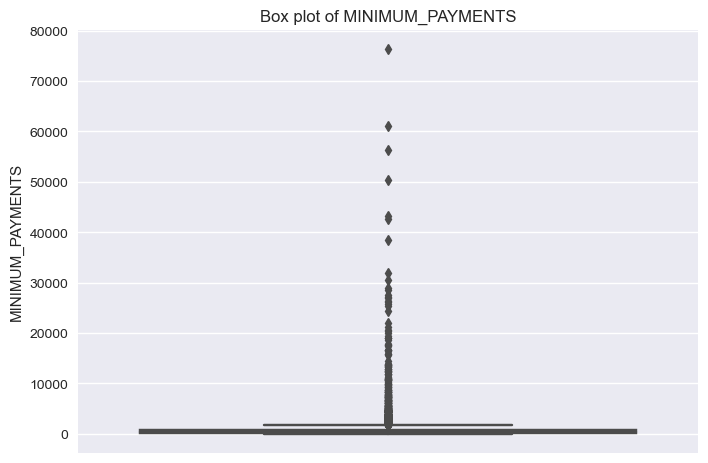

In [16]:
##Checking the distribution of 'MINIMUM_PAYMENTS'

sns.boxplot(y = "MINIMUM_PAYMENTS", data=creditcarddata)
plt.title("Box plot of MINIMUM_PAYMENTS")

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [17]:
#Impute with median

creditcarddata['MINIMUM_PAYMENTS'].fillna(creditcarddata['MINIMUM_PAYMENTS'].median(),inplace = True)

In [18]:
#Rechecking whether imputing sucessfull or not
creditcarddata['MINIMUM_PAYMENTS'].isnull().sum()

0

**Observations**
- There are 8950 observations and 18 features
- 18 Numerical columns
- There are missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'
- Data is skewed in CREDIT_LIMIT and MINIMUM_PAYMENTS
- We have used median to impute the missing value data

----

## Deriving New KPI

---

#### Monthly Average Purchase

In [19]:
creditcarddata["Monthly_Avg_Purchase"] = creditcarddata["PURCHASES"]/creditcarddata["TENURE"]

In [20]:
creditcarddata["Monthly_Avg_Purchase"].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

#### Monthly cash advance amount

In [21]:
creditcarddata["Monthly_Cash_Advance"] = creditcarddata["CASH_ADVANCE"]/creditcarddata["TENURE"]

### Purchase Type

In [22]:
creditcarddata.loc[:,["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


- Deriving the categorical variable based on user behaviour

In [23]:
def purchasetype(x):    
    if (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("NONE")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("ONEOFF")
    elif (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("INSTALLMENTS")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("BOTH_ONEOFF_INSTALLMENTS")

In [24]:
creditcarddata["Purchase_Type"] = creditcarddata.apply(purchasetype,axis=1)

In [25]:
creditcarddata["Purchase_Type"].value_counts()

BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: Purchase_Type, dtype: int64

### Limit usage

- Balance to credit limit ratio

In [26]:
creditcarddata["Balance_Credit_Ratio"] = creditcarddata["BALANCE"]/creditcarddata["CREDIT_LIMIT"]

In [27]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENTS,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONEOFF,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,ONEOFF,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONEOFF,0.681429


### Payments to Minimum Payments Ratio
- Total Payment Ratio calculate it by dividing your total monthly credit payments by the total minimum due

In [28]:
#added where clause to avoid division by zero

creditcarddata["Total_Payment_Ratio"] = np.where(creditcarddata["MINIMUM_PAYMENTS"] == 0,creditcarddata["MINIMUM_PAYMENTS"], creditcarddata["PAYMENTS"]/creditcarddata["MINIMUM_PAYMENTS"])

In [29]:
creditcarddata = creditcarddata.round(2)

In [30]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,0.04,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,0.46,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONEOFF,0.33,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,7500.0,0.00,312.34,0.00,12,124.92,17.15,ONEOFF,0.22,0.00
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONEOFF,0.68,2.77


---

## Insights from new KPIs

---

In [31]:
#Average Total Payment Ratio  for each purchase type

x = creditcarddata[["Purchase_Type","Total_Payment_Ratio"]].groupby(["Purchase_Type"]).agg("mean").reset_index()
x

,Purchase_Type,Total_Payment_Ratio
0,BOTH_ONEOFF_INSTALLMENTS,7.237087
1,INSTALLMENTS,13.259013
2,NONE,10.087311
3,ONEOFF,5.571051


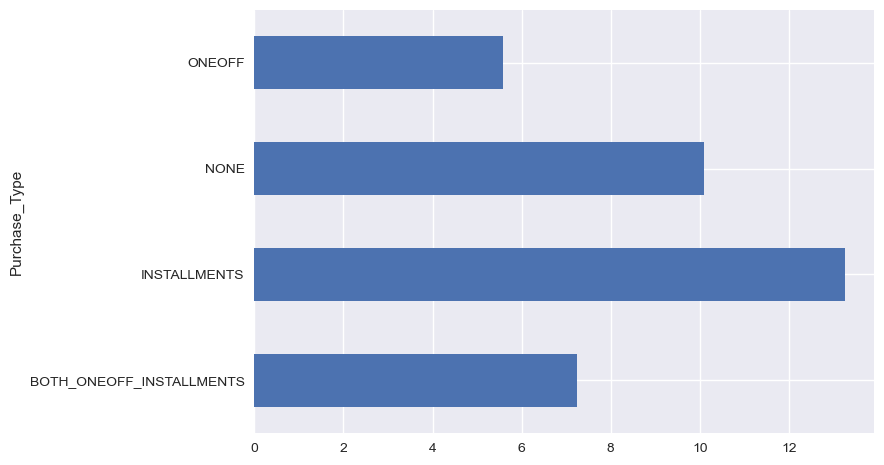

In [32]:
#checking the total payment ratio based on purchase type

creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Total_Payment_Ratio"])).plot.barh()
plt.show()

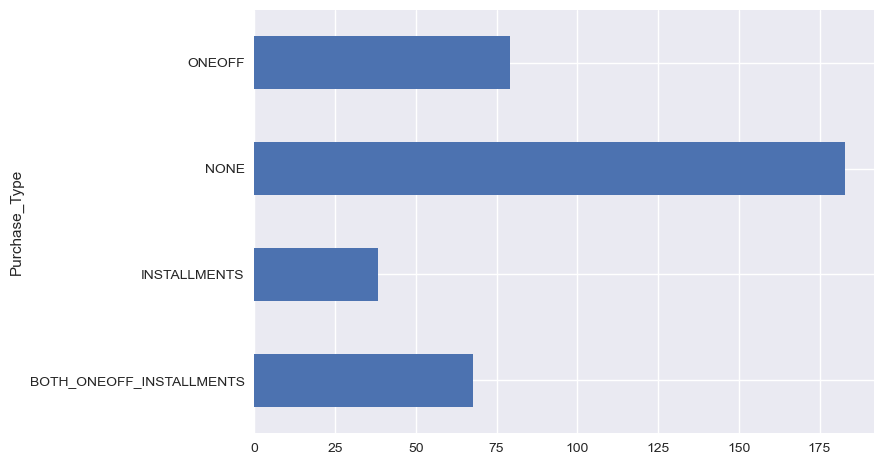

In [33]:
creditcarddata.groupby('Purchase_Type').apply(lambda x : np.mean(x['Monthly_Cash_Advance'])).plot.barh()
plt.show()

#### Insights
- Customers with installment payments are paying dues
- Customers who do not do ONOFF or INSTALLMENTS take more cash advance
- Customers with installment purchases have good credit score

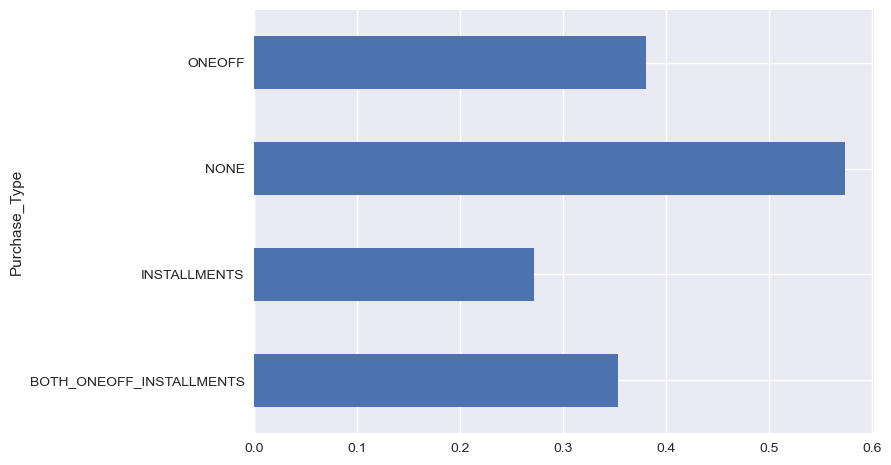

In [34]:
#balance to credit ratio (limit usage ratio) is more then the customers will have good credit score

creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Balance_Credit_Ratio"])).plot.barh()
plt.show()

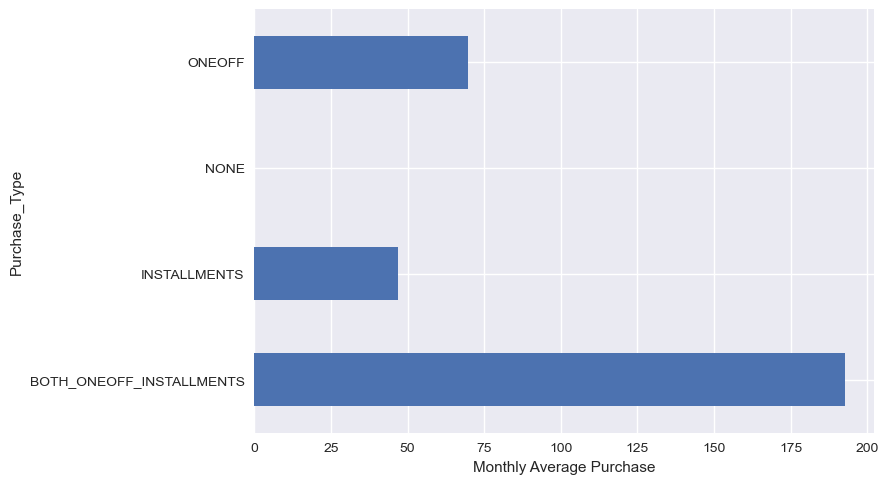

In [35]:
#checking the monthly average purchases based on payment type
creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Monthly_Avg_Purchase"])).plot.barh()
plt.xlabel("Monthly Average Purchase")
plt.show()

Customers using both oneoff and installment payment has more monthly average purchases

### Data Segregation
- Handling Categorical Variable

In [36]:
#getting the numeric variable names and data
creditcarddata_numeric = creditcarddata._get_numeric_data()

In [37]:
numeric_variable_names =  list(creditcarddata_numeric.columns)

In [38]:
numeric_variable_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Cash_Advance',
 'Balance_Credit_Ratio',
 'Total_Payment_Ratio']

There are many variables having extreme values, i am doing the log transformation on the dataset to remove the outlier effect

In [39]:
#log transformation

credit_log = creditcarddata_numeric.apply(lambda x: np.log(x + 1))

In [40]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161638,0.619992,4.899647,3.204274,3.352403,3.319086,0.361112,0.158423,0.270125,0.113286,...,1.894731,8.094825,6.624541,5.916079,0.117550,2.519680,3.050872,2.163969,0.296065,1.357595
std,2.013303,0.148856,2.916872,3.246365,3.082973,3.566298,0.277560,0.216834,0.281965,0.156823,...,1.373856,0.819629,1.591761,1.169927,0.211692,0.130367,2.002826,2.429742,0.250341,0.940158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.019803,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861981,0.636577,3.704627,0.000000,0.000000,0.000000,0.076961,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951352,5.146666,0.000000,2.564949,1.481032,0.000000,0.039221,0.647103
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.076961,0.157004,0.000000,...,2.079442,8.006701,6.754488,5.747289,0.000000,2.564949,3.494536,0.000000,0.262364,1.108563
75%,7.628098,0.693147,7.013133,6.360274,6.151961,7.016450,0.652325,0.262364,0.559616,0.198851,...,2.890372,8.779711,7.550732,6.671669,0.131028,2.564949,4.587286,4.606045,0.542324,1.953028
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834124,11.243832,0.693147,2.564949,8.315721,8.276166,2.827905,8.830767


In [41]:
#categorical variable names
catergorical_variable_names = [x for x in list(creditcarddata.columns) if x not in numeric_variable_names]

In [42]:
catergorical_variable_names

['CUST_ID', 'Purchase_Type']

In [43]:
#removing the customer id as it is not significant
catergorical_variable_names.remove("CUST_ID")

- Converting to Dummy Variables

In [44]:
dummies = pd.get_dummies(creditcarddata[catergorical_variable_names])

In [45]:
dummies.head()

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [46]:
pd.concat([creditcarddata,dummies],axis=1).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,12,7.95,0.00,INSTALLMENTS,0.04,1.45,0,1,0,0
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,12,0.00,536.91,NONE,0.46,3.83,0,0,1,0
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,64.43,0.00,ONEOFF,0.33,0.99,0,0,0,1
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,12,124.92,17.15,ONEOFF,0.22,0.00,0,0,0,1
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,12,1.33,0.00,ONEOFF,0.68,2.77,0,0,0,1


In [47]:
#keeping an orignal data copy

creditcarddata_org = pd.concat([creditcarddata,dummies],axis=1)

In [48]:
creditcarddata_org.mean()

C:\Users\Priya\AppData\Local\Temp\ipykernel_12208\3974926949.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  creditcarddata_org.mean()


BALANCE                                   1564.474826
BALANCE_FREQUENCY                            0.877426
PURCHASES                                 1003.204834
ONEOFF_PURCHASES                           592.437371
INSTALLMENTS_PURCHASES                     411.067645
CASH_ADVANCE                               978.871102
PURCHASES_FREQUENCY                          0.490217
ONEOFF_PURCHASES_FREQUENCY                   0.202177
PURCHASES_INSTALLMENTS_FREQUENCY             0.364553
CASH_ADVANCE_FREQUENCY                       0.134911
CASH_ADVANCE_TRX                             3.248827
PURCHASES_TRX                               14.709832
CREDIT_LIMIT                              4494.282473
PAYMENTS                                  1733.143878
MINIMUM_PAYMENTS                           844.906653
PRC_FULL_PAYMENT                             0.153534
TENURE                                      11.517318
Monthly_Avg_Purchase                        86.175139
Monthly_Cash_Advance        

In [49]:
#merging the log data and dummies data
creditcarddata_merged = pd.concat([credit_log,dummies],axis = 1)

In [50]:
##dropping the variables used to create the KPI
var_names = ["BALANCE","PURCHASES","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE","CASH_ADVANCE","CREDIT_LIMIT"]


creditcarddata_new = creditcarddata_merged[[x for x in creditcarddata_merged.columns if x not in var_names]]

In [51]:
creditcarddata_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0.598837,0.000000,4.568506,0.157004,0.000000,0.076961,0.000000,0.000000,1.098612,2.191654,0.000000,0.039221,0.896088,0,1,0,0
1,0.647103,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287691,0.378436,1.574846,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180981,0.000000,0.285179,0.688135,0,0,0,1
3,0.494696,7.313220,0.000000,0.076961,0.076961,0.000000,0.076961,0.693147,0.693147,4.835647,2.898671,0.198851,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.076961,0.076961,0.000000,0.000000,0.000000,0.693147,0.845868,0.000000,0.518794,1.327075,0,0,0,1


In [52]:
#datatypes of new dataframe

creditcarddata_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Avg_Purchase                      float64
Monthly_Cash_Advance                      float64
Balance_Credit_Ratio                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS      uint8
Purchase_Type_INSTALLMENTS                  uint8
Purchase_Type_NONE                          uint8
Purchase_Type_ONEOFF                        uint8
dtype: object

### Check for multicollinearity

In [53]:
#correlation matrix

creditcarddata_new.corr()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
BALANCE_FREQUENCY,1.000000,0.140011,0.110737,0.212020,0.199246,0.162496,0.194964,0.191120,0.197661,0.136655,0.153206,0.452558,-0.153108,0.191332,-0.134297,0.011392,-0.085826
ONEOFF_PURCHASES,0.140011,1.000000,0.161434,0.393549,0.812792,0.097203,-0.128254,-0.144803,0.574393,0.712305,-0.182490,-0.063056,0.236802,0.661126,-0.573717,-0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110737,0.161434,1.000000,0.804250,0.191702,0.905355,-0.309380,-0.335621,0.782683,0.687568,-0.377478,-0.217464,0.185808,0.607277,0.448744,-0.591238,-0.559631
PURCHASES_FREQUENCY,0.212020,0.393549,0.804250,1.000000,0.503709,0.857019,-0.344712,-0.382300,0.921747,0.816756,-0.433223,-0.232964,0.196354,0.521632,0.309963,-0.707119,-0.194572
ONEOFF_PURCHASES_FREQUENCY,0.199246,0.812792,0.191702,0.503709,1.000000,0.143712,-0.122523,-0.145779,0.621777,0.624033,-0.178047,-0.080859,0.259715,0.555684,-0.424674,-0.397252,0.231569
PURCHASES_INSTALLMENTS_FREQUENCY,0.162496,0.097203,0.905355,0.857019,0.143712,1.000000,-0.290063,-0.315110,0.769830,0.613860,-0.354119,-0.191249,0.141595,0.486772,0.446448,-0.520620,-0.493043
CASH_ADVANCE_FREQUENCY,0.194964,-0.128254,-0.309380,-0.344712,-0.122523,-0.290063,1.000000,0.936110,-0.326467,-0.340227,0.825831,0.432835,-0.130852,-0.103763,-0.252529,0.402654,-0.027705
CASH_ADVANCE_TRX,0.191120,-0.144803,-0.335621,-0.382300,-0.145779,-0.315110,0.936110,1.000000,-0.357895,-0.378009,0.902805,0.467670,-0.146754,-0.109572,-0.279532,0.448072,-0.039111
PURCHASES_TRX,0.197661,0.574393,0.782683,0.921747,0.621777,0.769830,-0.326467,-0.357895,1.000000,0.899851,-0.414204,-0.194133,0.237142,0.620589,0.161920,-0.749516,-0.105244
Monthly_Avg_Purchase,0.136655,0.712305,0.687568,0.816756,0.624033,0.613860,-0.340227,-0.378009,0.899851,1.000000,-0.426931,-0.223222,0.290685,0.573881,0.089252,-0.828241,0.106638


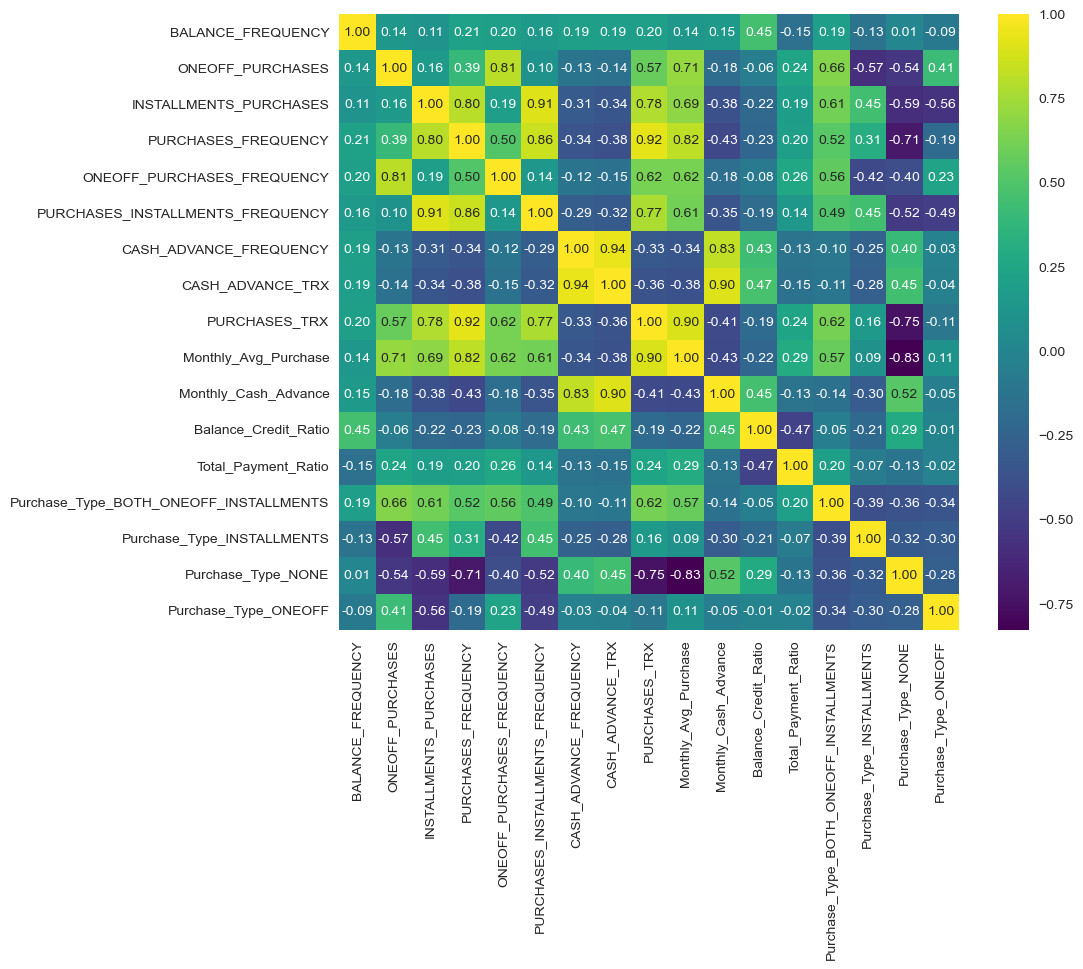

In [54]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(creditcarddata_new.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

<big>
- Heat map shows that many features are co-related so applying dimension reduction wull help negating multi-colinearity in data.
</big>

- Before applying the PCA we will standardize data to avoid effect of scale on the result. Scaling will make all features with equal weight.

### Standardization of data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#Create an object

sc = StandardScaler()

In [57]:
creditcard_scaled = sc.fit_transform(creditcarddata_new)

In [58]:
pd.DataFrame(creditcard_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.382342e-16,0.000000,1.034058e-16,-9.526830e-18,1.714829e-16,-1.143220e-16,6.986342e-17,-5.795488e-17,1.397268e-16,-4.922195e-17,-4.842805e-17,-6.033659e-17,1.262305e-16,4.445854e-17,-6.986342e-17,5.160366e-17,-9.526830e-17
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-4.165266e+00,-0.987090,-1.087454e+00,-1.301095e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-1.379210e+00,-1.523368e+00,-8.906669e-01,-1.182714e+00,-1.444087e+00,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,1.114241e-01,-0.987090,-1.087454e+00,-1.023803e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-8.746552e-01,-7.838563e-01,-8.906669e-01,-1.026036e+00,-7.557570e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,4.914786e-01,0.141485,3.721960e-01,1.598063e-01,-3.757081e-01,-4.012107e-01,-7.224223e-01,-8.100687e-01,1.344545e-01,2.215312e-01,-8.906669e-01,-1.346266e-01,-2.648979e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,4.914786e-01,0.972218,9.081215e-01,1.049250e+00,4.793874e-01,1.026748e+00,5.456405e-01,7.846025e-01,7.247459e-01,7.671657e-01,1.005132e+00,9.837522e-01,6.333683e-01,1.492109e+00,1.720516e+00,-5.436904e-01,-5.146250e-01
max,4.914786e-01,2.283062,2.163264e+00,1.196332e+00,2.466195e+00,1.500349e+00,5.120722e+00,3.965987e+00,2.903371e+00,2.628856e+00,2.515715e+00,1.011415e+01,7.949291e+00,1.492109e+00,1.720516e+00,1.839282e+00,1.943162e+00


### PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
#applying the PCA to find the number of factors

variance_ratio = {}
for n in range(2,18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(creditcard_scaled)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)


In [61]:
#ratio of variance explained 
variance_ratio

{2: 0.5824607599200571,
 3: 0.7297466434636772,
 4: 0.8113282252273156,
 5: 0.8768561357190722,
 6: 0.9184810955062338,
 7: 0.9409751162847567,
 8: 0.9615534006293803,
 9: 0.9739448843439257,
 10: 0.9835980480783894,
 11: 0.9897248725782212,
 12: 0.9927531994176734,
 13: 0.9953959123246207,
 14: 0.9979644752646768,
 15: 0.9996366026820455,
 16: 1.0000000000000002,
 17: 1.0000000000000002}

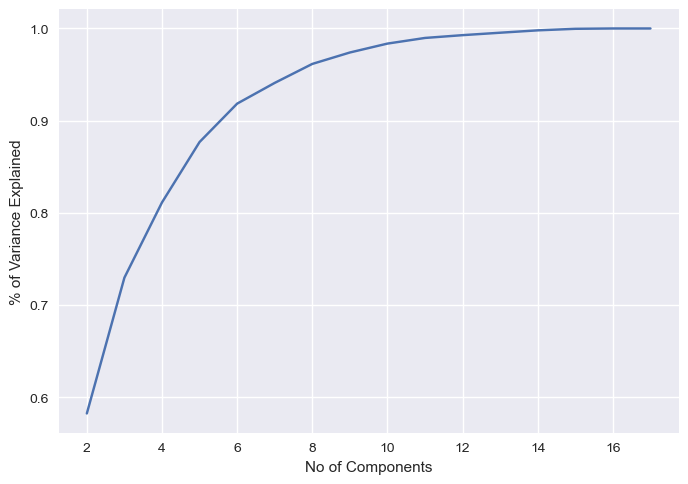

In [62]:
#plotting the graph

pd.Series(variance_ratio).plot()
plt.xlabel("No of Components")
plt.ylabel("% of Variance Explained")
plt.show()

<big>
- Since 5 Components are explaining about 88% of the variance we select 5 components
</big>

In [63]:
final_pc = PCA(n_components=5).fit(creditcard_scaled)

reduced_creditdata = final_pc.fit_transform(creditcard_scaled)

In [64]:
#main data set has 17 components
creditcard_scaled.shape

(8950, 17)

In [65]:
#after doing pca we got 5 components
reduced_creditdata.shape

(8950, 5)

In [66]:
column_names = creditcarddata_new.columns
column_names

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_Cash_Advance', 'Balance_Credit_Ratio', 'Total_Payment_Ratio',
       'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS',
       'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'],
      dtype='object')

- Visualizing the reduced factors

In [67]:
pd.DataFrame(final_pc.components_.T,columns=['PC_' + str(i) for i in range(5)],index=column_names)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029847,0.240297,-0.262754,-0.353524,-0.228764
ONEOFF_PURCHASES,0.214081,0.405781,0.240049,0.001340,-0.023165
INSTALLMENTS_PURCHASES,0.312163,-0.098002,-0.315571,0.087945,-0.002057
PURCHASES_FREQUENCY,0.345816,0.016014,-0.163088,-0.074366,0.115332
ONEOFF_PURCHASES_FREQUENCY,0.214669,0.361716,0.163291,0.036587,-0.051420
PURCHASES_INSTALLMENTS_FREQUENCY,0.295541,-0.111518,-0.330038,0.023473,0.025880
CASH_ADVANCE_FREQUENCY,-0.213932,0.286571,-0.278261,0.096093,0.360749
CASH_ADVANCE_TRX,-0.229368,0.292065,-0.284771,0.103467,0.332620
PURCHASES_TRX,0.355594,0.106799,-0.102334,-0.054427,0.104945
Monthly_Avg_Purchase,0.346031,0.141640,0.024457,-0.079612,0.194129


In [68]:
pd.DataFrame(final_pc.explained_variance_ratio_,columns=["Variance Ratio"],index=["PC_" + str(i) for i in range(5)])

,Variance Ratio
PC_0,0.401937
PC_1,0.180524
PC_2,0.147286
PC_3,0.081582
PC_4,0.065528


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

### Clustering
- Find the optimum number of clusters using Silhoutte Coefficient

In [69]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [70]:
scores = []
inertia = []
k_range = range(3, 12)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(creditcard_scaled)
    scores.append(metrics.silhouette_score(creditcard_scaled, km.labels_))
    inertia.append(km.inertia_)

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priya\anaconda3\lib\site-packages\sklearn\clust

In [71]:
scores

[0.31677629527868134,
 0.3883321935622073,
 0.37761915855698325,
 0.36635827357507383,
 0.3447318799457864,
 0.330819759707984,
 0.3294924060982644,
 0.30588511503722565,
 0.30774845019733005]

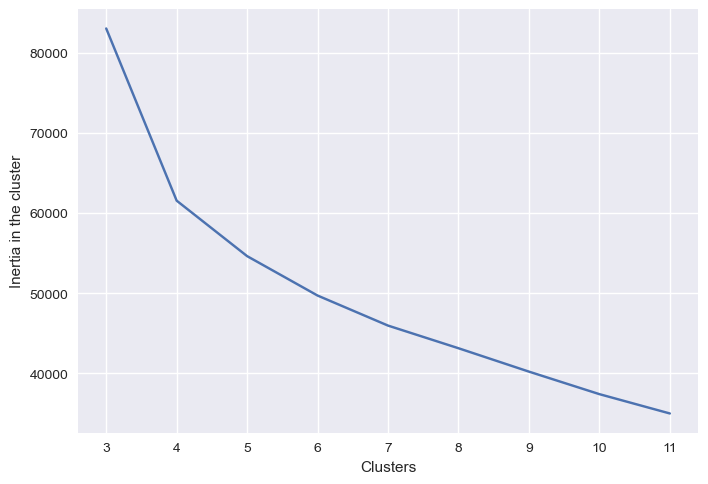

In [72]:
plt.plot(k_range,inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

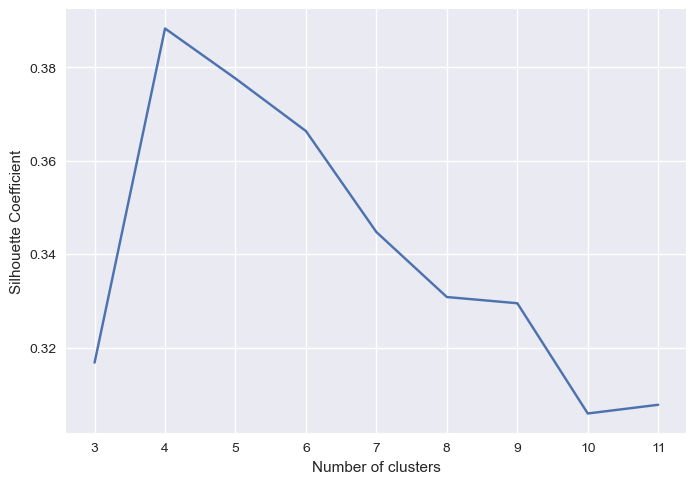

In [73]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Insights
- From SC Score, the number of optimal clusters could be 4 or 5

### Profiling
- To find the right clustering we will do profiling for 4, 5 clusters

### 4-Cluster Solution

In [110]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [111]:
#fitting the Kmeans 
km_4.fit(reduced_creditdata)
km_4.labels_

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 0, ..., 3, 1, 0])

In [112]:
from sklearn.metrics import silhouette_score
cluster_labels = km_4.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(creditcard_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3879092734287871


In [76]:
#proportion of labels classified

pd.Series(km_4.labels_).value_counts()

2    2758
3    2229
1    2089
0    1874
dtype: int64

<big>
Plotting the 4 cluster Solution labels    
</big>

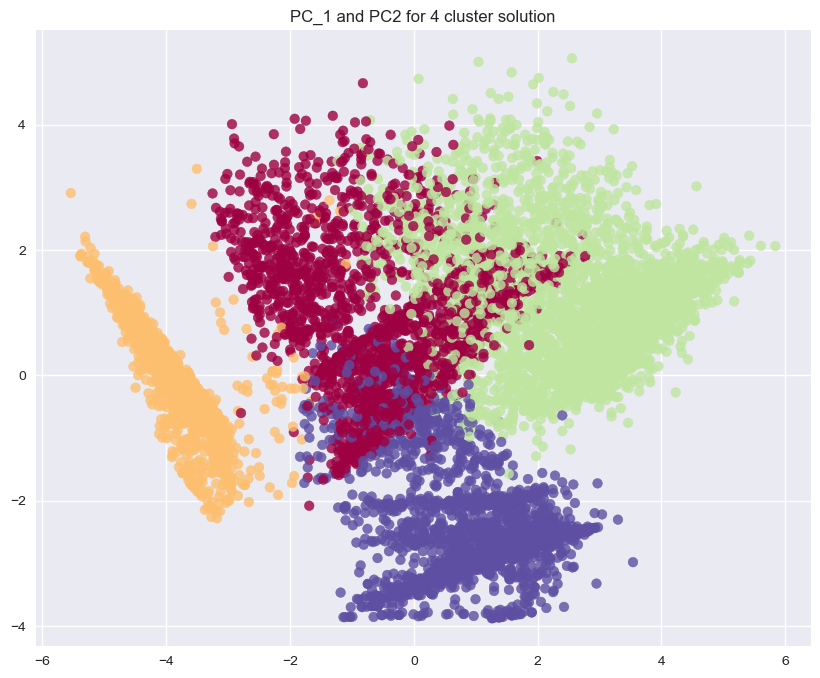

In [77]:
plt.figure(figsize=(10, 8 ))
plt.scatter(reduced_creditdata[:, 0], reduced_creditdata[:, 1], c = km_4.labels_, cmap = "Spectral", alpha = 0.8)
plt.title("PC_1 and PC2 for 4 cluster solution")
plt.show()

<big> 
    Taking the key performance index variables for analysis
</big>

In [78]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [79]:
#making a dataframe with 4 cluster solution labels

cluster_df_4 = pd.concat([creditcarddata_org[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)

In [80]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.95,0.00,0.04,0,1.45,1,0,0,0,1000.0,3
1,0,0.00,536.91,0.46,4,3.83,0,1,0,0,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,0,0,0,1,7500.0,0
3,1,124.92,17.15,0.22,1,0.00,0,0,0,1,7500.0,0
4,1,1.33,0.00,0.68,0,2.77,0,0,0,1,1200.0,0


#### Grouping the data based on cluster.

#### Mean gives a good indication of the distribution of data. so we are finding the mean for each variable for each cluster 


In [81]:
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_key_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.118997,0.044998,33.125453,12.049349
Monthly_Avg_Purchase,69.758170,0.157688,193.696041,47.553876
Monthly_Cash_Advance,77.843474,186.380235,67.620018,33.481377
Balance_Credit_Ratio,0.378629,0.576103,0.354572,0.264459
CASH_ADVANCE_TRX,2.864995,6.553854,2.807107,1.020637
Total_Payment_Ratio,5.561393,9.931565,7.268709,13.397622
Purchase_Type_INSTALLMENTS,0.000000,0.016754,0.000000,0.998205
Purchase_Type_NONE,0.000000,0.977501,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.003735,0.002393,1.000000,0.001795
Purchase_Type_ONEOFF,0.996265,0.003351,0.000000,0.000000


In [82]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [83]:
ClusterPercentage(cluster_df_4,"Cluster_4")

,Cluster_Size,Cluster_Percentage
0,1874,20.94
1,2089,23.34
2,2758,30.82
3,2229,24.91


In [84]:
#transposing the cluster
cluster_4_T = cluster_4.T

In [85]:
cluster_4_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_4,,,,,,,,,,,
0,7.118997,69.758170,77.843474,0.378629,2.864995,5.561393,0.000000,0.000000,0.003735,0.996265,4512.905630
1,0.044998,0.157688,186.380235,0.576103,6.553854,9.931565,0.016754,0.977501,0.002393,0.003351,4056.949100
2,33.125453,193.696041,67.620018,0.354572,2.807107,7.268709,0.000000,0.000000,1.000000,0.000000,5750.015566
3,12.049349,47.553876,33.481377,0.264459,1.020637,13.397622,0.998205,0.000000,0.001795,0.000000,3334.739067


In [86]:
def ClusterAnalysis(datafr):
    """A function to analyze the KPI variables across each segment in the cluster and returns dataframe useful for plotting"""
    
    #Build a dataframe of KPI for each cluster suitable for plotting
    n = datafr.shape[0]
    
    mn_cash_advnce = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Cash_Advance"]))
    balance_crdt_ratio = pd.Series(datafr.reset_index(drop = True)["Balance_Credit_Ratio"])
    mn_avg_purchases = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Avg_Purchase"]))
    total_pymnt_ratio = pd.Series(datafr.reset_index(drop = True)["Total_Payment_Ratio"])
    installment = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_INSTALLMENTS"])
    oneoff = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_ONEOFF"])

    final_df = pd.concat([mn_cash_advnce,mn_avg_purchases,balance_crdt_ratio,total_pymnt_ratio,installment,oneoff],axis=1)
    final_df.columns=["Monthly_Cash_Advance","Monthly_Avg_Purchase","Balance_Credit_Ratio","Total_Payment_Ratio","Installments","Oneoff"]
    final_df.index = ["Cl-"+ str(i) for i in range(n)]
    return(final_df)
    

In [87]:
final_df_4 = ClusterAnalysis(cluster_4_T)
final_df_4

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,4.354700,4.245035,0.378629,5.561393,0.000000,0.996265
Cl-1,5.227789,-1.847138,0.576103,9.931565,0.016754,0.003351
Cl-2,4.213904,5.266290,0.354572,7.268709,0.000000,0.000000
Cl-3,3.510989,3.861863,0.264459,13.397622,0.998205,0.000000


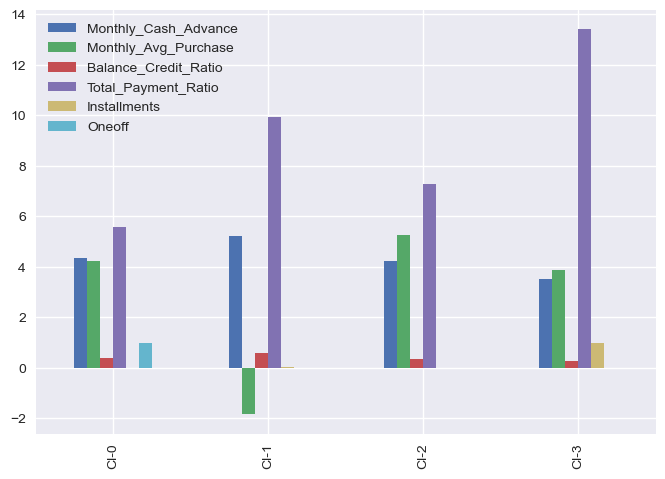

In [88]:
final_df_4.plot(kind = "bar")
#plt.xticks(["11","22","33","44"])
plt.show()

### Insights with 4 Clusters
----
<big>
- Cluster 0 is the group of customers who have the highest Montly Average Purchases and doing both installment and one off purchases. **This group is about 31% of the total customer base**
- Cluster 1 customers are doing  maximum one off payments and least total payment ratio. **This group is about 21% of the total customer base**
- Cluster 2 customers have lowest balance to credit ratio (good credit score) and are paying dues also doing maximum installment purchases. **This group is about 25% of the total customer base**
- Cluster 3 customers are taking maximum advance cash and has high debt to credit ratio (poor credit rating) & not doing any purchase transcation.**This group is about 23% of the total customer base**

----

### 5 Cluster Solution 

In [89]:
km_5 = KMeans(n_clusters=5,random_state=123)
km_5.fit(reduced_creditdata)

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [113]:
km_5.labels_

array([4, 1, 0, ..., 4, 1, 0])

In [114]:
from sklearn.metrics import silhouette_score
cluster_labels = km_5.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(creditcard_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.37844116487691404


In [91]:
#distribution of labels

pd.Series(km_5.labels_).value_counts()

4    2130
1    2084
2    1985
0    1860
3     891
dtype: int64

<big>
Plotting the 5 Cluster Solution Labels
</big>

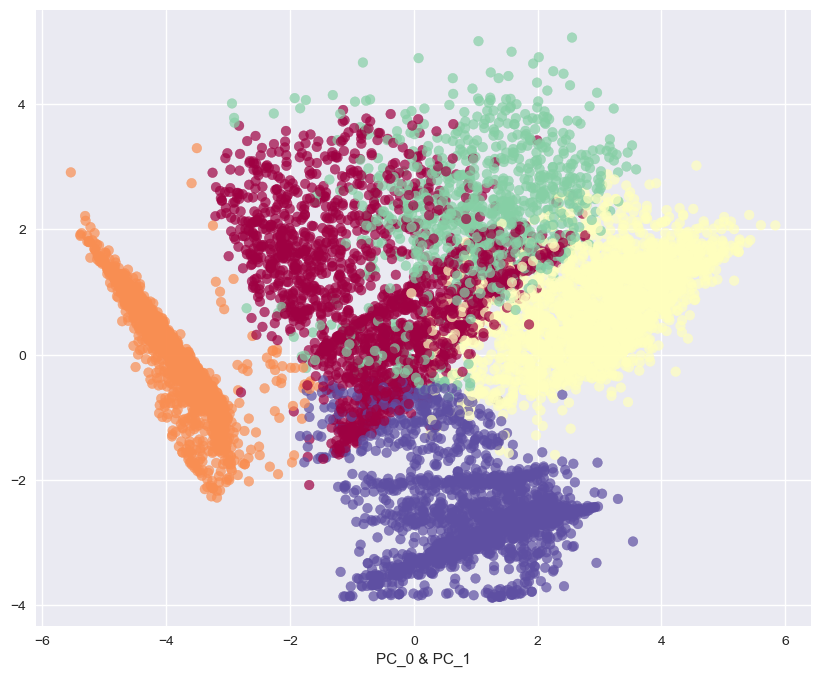

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(reduced_creditdata[:,0],reduced_creditdata[:,1],c=km_5.labels_,cmap="Spectral",alpha = 0.7)
plt.xlabel("PC_0 & PC_1")
plt.show()

In [93]:
#5 cluster dataframe with labels

cluster_df_5 = pd.concat([creditcarddata_org[col_key_kpi],pd.Series(km_5.labels_,name="Cluster_5")], axis = 1)

In [94]:
cluster_df_5.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_5
0,2,7.95,0.00,0.04,0,1.45,1,0,0,0,1000.0,4
1,0,0.00,536.91,0.46,4,3.83,0,1,0,0,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,0,0,0,1,7500.0,0
3,1,124.92,17.15,0.22,1,0.00,0,0,0,1,7500.0,0
4,1,1.33,0.00,0.68,0,2.77,0,0,0,1,1200.0,0


In [95]:
#calculating the mean of all variables in the cluster

cluster_5 = cluster_df_5.groupby("Cluster_5").apply(lambda x: x[col_key_kpi].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.067742,0.035509,34.533501,27.546577,11.896714
Monthly_Avg_Purchase,68.685618,0.096569,209.710831,141.879293,47.239690
Monthly_Cash_Advance,73.635694,185.109535,3.988166,252.419820,19.154812
Balance_Credit_Ratio,0.377468,0.576291,0.262962,0.594658,0.246723
CASH_ADVANCE_TRX,2.648387,6.454894,0.152141,10.520763,0.480282
Total_Payment_Ratio,5.540070,9.950029,8.569078,3.921919,13.866221
Purchase_Type_INSTALLMENTS,0.000000,0.016795,0.000000,0.106622,1.000000
Purchase_Type_NONE,0.000000,0.979846,0.000000,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.003226,0.000000,1.000000,0.878788,0.000000
Purchase_Type_ONEOFF,0.996774,0.003359,0.000000,0.014590,0.000000


In [96]:
#transposing the cluster
cluster_5_T = cluster_5.T
cluster_5_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_5,,,,,,,,,,,
0,7.067742,68.685618,73.635694,0.377468,2.648387,5.540070,0.000000,0.000000,0.003226,0.996774,4489.884489
1,0.035509,0.096569,185.109535,0.576291,6.454894,9.950029,0.016795,0.979846,0.000000,0.003359,4047.344851
2,34.533501,209.710831,3.988166,0.262962,0.152141,8.569078,0.000000,0.000000,1.000000,0.000000,5716.152610
3,27.546577,141.879293,252.419820,0.594658,10.520763,3.921919,0.106622,0.000000,0.878788,0.014590,5863.748597
4,11.896714,47.239690,19.154812,0.246723,0.480282,13.866221,1.000000,0.000000,0.000000,0.000000,3223.856047


In [97]:
ClusterPercentage(cluster_df_5,"Cluster_5")

,Cluster_Size,Cluster_Percentage
0,1860,20.78
1,2084,23.28
2,1985,22.18
3,891,9.96
4,2130,23.80


In [98]:
final_df_5 = ClusterAnalysis(cluster_5_T)
final_df_5

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,4.299130,4.229540,0.377468,5.540070,0.000000,0.996774
Cl-1,5.220948,-2.337496,0.576291,9.950029,0.016795,0.003359
Cl-2,1.383332,5.345730,0.262962,8.569078,0.000000,0.000000
Cl-3,5.531094,4.954977,0.594658,3.921919,0.106622,0.014590
Cl-4,2.952554,3.855234,0.246723,13.866221,1.000000,0.000000


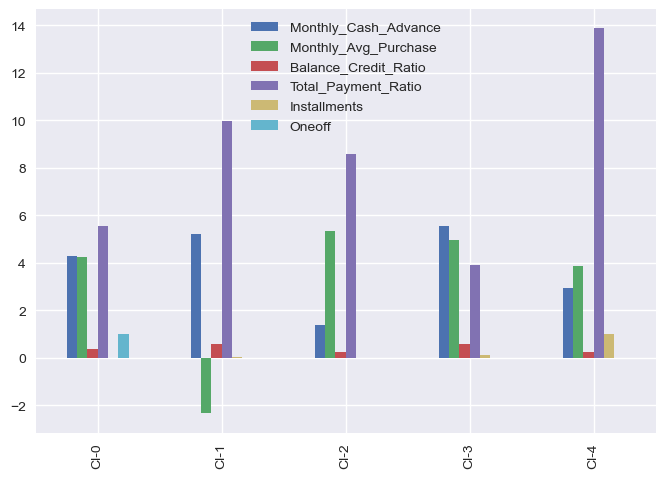

In [99]:
final_df_5.plot(kind = "bar")

plt.show()

### Insights with 5 Clusters
----
<big>
    
- We have a group of customers (cluster-2) having highest average purchases but there is cluster-3 also having highest cash advance and second highest purchase behaviour but their type of purchases are same

- Cluster 1 and Cluster 3 are behaving similar interms of balance to credit ratio and their monthly cash advances is also on higher side
----
**So we don't have quite distinquisble characters with 5 clusters**

## Marketing Strategy Suggested Cluster 4
---

###  Group 0
   - This is performing best among all the clusters are maintaining highest monthly average purchases. Giving any reward points might increase their purchases.
   
### Group 1
   - This group is doing maximum oneoff payments(may be for bills only). Customers of this group can be offered discount/offer on next transactions upon full payment.
   
### Group 2 
   - They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. Promote premium cards/loyality cars to increase transcations.
   
### Group 3
   - These customers are taking maximum cash advance, these customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.